# Task 1 :Prediction Using Supervised ML

Ques : Predict the percentage of marks of an student based on the number of study hours 

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
#reading the csv file
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

In [3]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Plotting the data

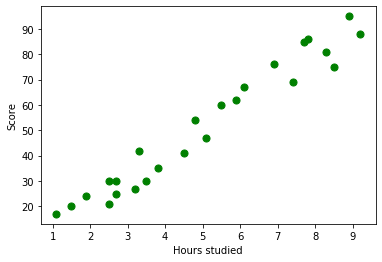

In [4]:
x = data['Hours']
y = data['Scores']
plt.scatter(x,y,c='g',s=50)
plt.xlabel('Hours studied')
plt.ylabel('Score')
plt.show()

The graph shows a linear relation between the number of hours studied by a student and the percentage of marks obtained. 

## Preparing the Data

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

In [7]:
X_train , X_test, Y_train , Y_test = train_test_split(X,Y,test_size=0.2)

We have splitted our data into training and testing sets.

# Training the algorithm 

Now we can train our algorithm with the data sets.

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train , Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

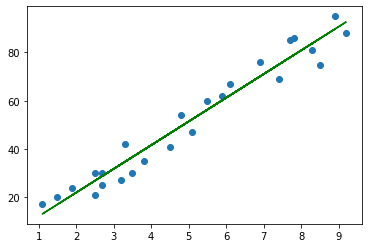

In [9]:
line = regressor.coef_*X+regressor.intercept_  # Plotting the regression line
plt.scatter(X, Y)
plt.plot(X, line,c='g')
plt.show()

# Making Predictions

Since training of the data is complete , we can make predictions

In [10]:
y_pred = regressor.predict(X_test)  #predicting the scores 

In [11]:
#Comparing the actual data with predicted data
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
5,20,16.996875
18,67,62.183863
20,30,28.784785
8,81,83.795031
4,30,36.643391


### Prediction of percentage score when giving own data of hours studied

In [12]:
hours = 9.25
pred_ = regressor.predict([[hours]])

In [13]:
print('Hours studied = ',hours)
print('Percentage of score obatined = ',pred_[0])


Hours studied =  9.25
Percentage of score obatined =  93.12712637198662


# Evaluate the model

Calculating the mean absolute error for the model

In [14]:
from sklearn import metrics
print("Mean absolute error = ",metrics.mean_absolute_error(Y_test,y_pred))

Mean absolute error =  3.694580031170207
